# Heart Attack Data Exploration

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline


## Loading and Preprocessing Heart Attack Data

In [2]:
# Loading data
file_path = Path("../Resources/heart_attack_prediction_dataset.csv")
df_heart = pd.read_csv(file_path)
df_heart.head()


Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [3]:
df_heart.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [4]:
# Define target vector
y = df_heart["Heart Attack Risk"]
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64

In [5]:
# Define features set
X = df_heart.copy()
X.drop(["Patient ID","Blood Pressure","Blood Pressure","Country","Continent","Hemisphere",
        "Smoking", "Diabetes", "Obesity", "Alcohol Consumption", "Previous Heart Problems", "Medication Use",
        "Family History", "Diet", "Sleep Hours Per Day", "Physical Activity Days Per Week", "Heart Attack Risk",
        "Stress Level", "Sex"], axis=1, inplace=True)
X.head()

Age  Cholesterol  Heart Rate  Exercise Hours Per Week  \
0   67          208          72                 4.168189   
1   21          389          98                 1.813242   
2   21          324          72                 2.078353   
3   84          383          73                 9.828130   
4   66          318          93                 5.804299   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  
0                 6.615001  261404  31.251233            286  
1                 4.963459  285768  27.194973            235  
2                 9.463426  235282  28.176571            587  
3                 7.648981  125640  36.464704            378  
4                 1.514821  160555  21.809144            231

In [6]:
print(X.columns)

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides'],
      dtype='object')


In [7]:
# # Sex Convert categorical column to binary (dummy) variables
# df_dummies = pd.get_dummies(X['Sex'], prefix='Sex')
# X.drop(["Sex"], axis=1, inplace=True)
# # Concatenate the dummy variables with the original DataFrame
# X = pd.concat([X, df_dummies], axis=1)
# X.head()

# # Hemisphere Convert categorical column to binary (dummy) variables
# df_dummies = pd.get_dummies(X['Hemisphere'], prefix='Hemisphere')
# X.drop(["Hemisphere"], axis=1, inplace=True)
# # Concatenate the dummy variables with the original DataFrame
# X = pd.concat([X, df_dummies], axis=1)
# X.head()

# # Diet Convert categorical column to binary (dummy) variables
# df_dummies = pd.get_dummies(X['Diet'], prefix='Diet')
# X.drop(["Diet"], axis=1, inplace=True)
# # Concatenate the dummy variables with the original DataFrame
# X = pd.concat([X, df_dummies], axis=1)
X.head()

Age  Cholesterol  Heart Rate  Exercise Hours Per Week  \
0   67          208          72                 4.168189   
1   21          389          98                 1.813242   
2   21          324          72                 2.078353   
3   84          383          73                 9.828130   
4   66          318          93                 5.804299   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  
0                 6.615001  261404  31.251233            286  
1                 4.963459  285768  27.194973            235  
2                 9.463426  235282  28.176571            587  
3                 7.648981  125640  36.464704            378  
4                 1.514821  160555  21.809144            231

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=75)

In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [11]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [12]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=75)

In [13]:
#NEW add name features as columns 
feature_names = X_train.columns  
print(feature_names)

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides'],
      dtype='object')


In [14]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [15]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [16]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         1355           57
Actual 1          752           27

Accuracy Score : 0.6307622090369694
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      1412
           1       0.32      0.03      0.06       779

    accuracy                           0.63      2191
   macro avg       0.48      0.50      0.42      2191
weighted avg       0.53      0.63      0.52      2191



## Feature Importance

In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13300461350274587, 'Income'),
 (0.1326743304212424, 'BMI'),
 (0.13158564837068057, 'Exercise Hours Per Week'),
 (0.13107200230629215, 'Sedentary Hours Per Day'),
 (0.129571387119704, 'Triglycerides'),
 (0.12244911589678456, 'Cholesterol'),
 (0.10992175596310289, 'Age'),
 (0.10972114641944752, 'Heart Rate')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

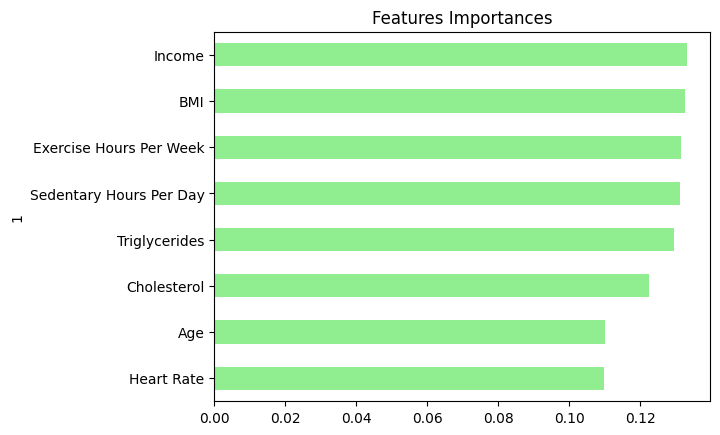

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Trial predict

In [20]:
# Predicts y_pred
y_pred = rf_model.predict(X_test)

/Users/chicken/dev/Assignments-and-Challenges/P3 App/.venv/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [21]:
#Let’s check the difference between the actual and predicted value
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

Actual  Predicted
618        0          1
6136       1          1
4705       0          1
6242       0          1
963        1          1
...      ...        ...
743        0          1
5064       0          1
7851       0          1
6698       0          0
427        1          1

[2191 rows x 2 columns]

## Import and run Pickle (best for smaller datasets, <GBs)

In [22]:
#pip install --upgrade pip

In [23]:
import pickle

In [24]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [25]:
# in your prediction file                                                                                                                                                                                                           
with open('model_pkl', 'rb') as f:
    rf = pickle.load(f)

In [26]:
predictions = rf.predict(X_test_scaled)
print(predictions)

[0 0 0 ... 0 0 0]


## Plot the difference between the actual and the predicted value.

In [28]:
import seaborn as sns

/var/folders/5g/dn_yhgs10s598t2wd7478p2w0000gp/T/ipykernel_75490/1013720118.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
/var/folders/5g/dn_yhgs10s598t2wd7478p2w0000gp/T/ipykernel_75490/1013720118.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

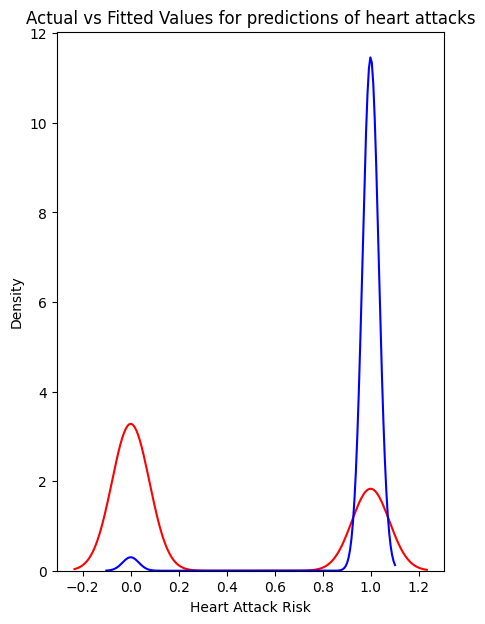

In [30]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for predictions of heart attacks')

plt.show()
plt.close()

## Import and run Joblib (best for larger datasets, file size >GBs if your predict is taking too long on Pickle)

In [ ]:
import joblib

In [ ]:
# create RF
rf = RandomForestClassifier()
# fit on some data
rf.fit(X, y)

In [ ]:
# save
joblib.dump(rf, "my_random_forest.joblib")

In [ ]:
# load
loaded_rf = joblib.load("my_random_forest.joblib")

In [ ]:
# load
loaded_rf = joblib.load("my_random_forest.joblib")